<a href="https://colab.research.google.com/github/vantong2001/Nguyen-Van-Tong---19146279/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, LSTM, BatchNormalization, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.1)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/train_data',
                                               target_size = (128,128),
                                               batch_size = 32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/train_data',
                                               target_size = (128,128),
                                               batch_size = 32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)

Found 2559 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       7

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(training_set, batch_size=32, epochs=50, verbose=1, validation_data=validation_set)

Epoch 1/50
80/80 [==============================] - 577s 7s/step - loss: 1.3698 - accuracy: 0.3705 - val_loss: 1.1090 - val_accuracy: 0.3675
Epoch 2/50
80/80 [==============================] - 278s 3s/step - loss: 1.0911 - accuracy: 0.3826 - val_loss: 1.0917 - val_accuracy: 0.3428
Epoch 3/50
80/80 [==============================] - 280s 3s/step - loss: 1.0745 - accuracy: 0.4115 - val_loss: 1.0809 - val_accuracy: 0.3922
Epoch 4/50
80/80 [==============================] - 277s 3s/step - loss: 1.0313 - accuracy: 0.4662 - val_loss: 1.0763 - val_accuracy: 0.3958
Epoch 5/50
80/80 [==============================] - 278s 3s/step - loss: 0.9718 - accuracy: 0.5178 - val_loss: 1.0354 - val_accuracy: 0.4912
Epoch 6/50
80/80 [==============================] - 277s 3s/step - loss: 0.9047 - accuracy: 0.5662 - val_loss: 0.9587 - val_accuracy: 0.4841
Epoch 7/50
80/80 [==============================] - 279s 3s/step - loss: 0.7991 - accuracy: 0.6198 - val_loss: 0.9570 - val_accuracy: 0.5300
Epoch 8/50
80

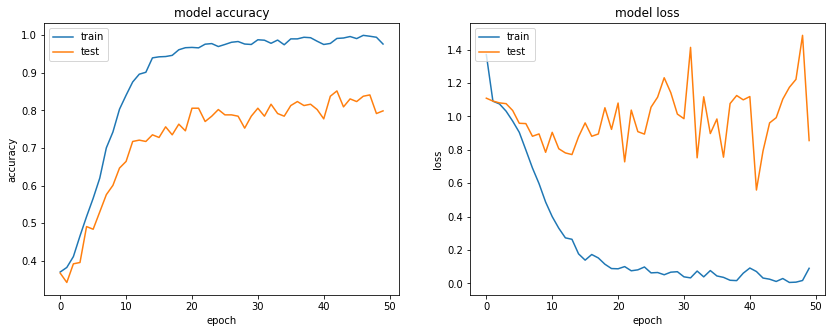

In [9]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9761625528335571
validation_accuracy 0.7985865473747253


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/test_data',
                                               target_size = (128,128),
                                               batch_size = 32)
model.evaluate(test_set)

Found 30 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step - loss: 1.5861 - accuracy: 0.8000


[1.5860610008239746, 0.800000011920929]

In [12]:
model.save("cancer.h5")

In [23]:
training_set.class_indices

{'benign_cases': 0, 'malignant_cases': 1, 'normal_cases': 2}

In [14]:
label = ['benign_cases', 'malignant_cases', 'normal_cases']

normal_cases


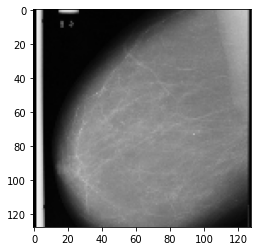

In [15]:
img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/normal_cases/bth (1).png', target_size = (128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

In [16]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/benign_cases/nhe ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

benign_cases
benign_cases
benign_cases
benign_cases
benign_cases
normal_cases
benign_cases
malignant_cases
benign_cases
benign_cases


In [17]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/malignant_cases/nang ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

malignant_cases
normal_cases
malignant_cases
normal_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases


In [18]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/normal_cases/bth ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

normal_cases
normal_cases
benign_cases
normal_cases
normal_cases
normal_cases
benign_cases
normal_cases
normal_cases
normal_cases


In [26]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("cancer.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5ypzy1yj/assets


INFO:tensorflow:Assets written to: /tmp/tmp5ypzy1yj/assets
